# DSBA 6010 Group Project

This project is aimed at applying statistical modeling techniques to predict defaulted credit card customers in Taiwan. 

https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients

# 0. Data Import

In [3]:
# download the dataset directory to Colab
# this is easier than uploading it to Colab manually for each person
!wget https://raw.githubusercontent.com/andrewkopti/dsba6010_project/main/data/default_of_credit_card_clients.csv

'wget' is not recognized as an internal or external command,
operable program or batch file.


In [1]:
# import dependencies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearnex import patch_sklearn

In [3]:
# create dataframe
df = pd.read_csv('default_of_credit_card_clients.csv')

# rename the columns so they are easier to work with
columns = {
    'X1': 'credit',
    'X2': 'gender',
    'X3': 'education',
    'X4': 'marital_status',
    'X5': 'age',
    'X6': 'payment_status_sep',
    'X7': 'payment_status_aug',
    'X8': 'payment_status_jul',
    'X9': 'payment_status_jun',
    'X10': 'payment_status_may',
    'X11': 'payment_status_apr',
    'X12': 'bill_sep',
    'X13': 'bill_aug',
    'X14': 'bill_jul',
    'X15': 'bill_jun',
    'X16': 'bill_may',
    'X17': 'bill_apr',
    'X18': 'prev_payment_sep',
    'X19': 'prev_payment_aug',
    'X20': 'prev_payment_jul',
    'X21': 'prev_payment_jun',
    'X22': 'prev_payment_may',
    'X23': 'prev_payment_apr',
    'Y': 'default'
}

df = df.rename(columns=columns)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20102 entries, 0 to 20101
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   credit              20102 non-null  int64
 1   gender              20102 non-null  int64
 2   education           20102 non-null  int64
 3   marital_status      20102 non-null  int64
 4   age                 20102 non-null  int64
 5   payment_status_sep  20102 non-null  int64
 6   payment_status_aug  20102 non-null  int64
 7   payment_status_jul  20102 non-null  int64
 8   payment_status_jun  20102 non-null  int64
 9   payment_status_may  20102 non-null  int64
 10  payment_status_apr  20102 non-null  int64
 11  bill_sep            20102 non-null  int64
 12  bill_aug            20102 non-null  int64
 13  bill_jul            20102 non-null  int64
 14  bill_jun            20102 non-null  int64
 15  bill_may            20102 non-null  int64
 16  bill_apr            20102 non-null  int6

# 1. Exploratory Data Analysis

Perform exploratory data analysis to better understand the data (Week #1-2 lectures).

In [9]:
df.isnull().sum()/len(df)

credit                0.0
gender                0.0
education             0.0
marital_status        0.0
age                   0.0
payment_status_sep    0.0
payment_status_aug    0.0
payment_status_jul    0.0
payment_status_jun    0.0
payment_status_may    0.0
payment_status_apr    0.0
bill_sep              0.0
bill_aug              0.0
bill_jul              0.0
bill_jun              0.0
bill_may              0.0
bill_apr              0.0
prev_payment_sep      0.0
prev_payment_aug      0.0
prev_payment_jul      0.0
prev_payment_jun      0.0
prev_payment_may      0.0
prev_payment_apr      0.0
default               0.0
dtype: float64

In [10]:
df.describe()

,credit,gender,education,marital_status,age,payment_status_sep,payment_status_aug,payment_status_jul,payment_status_jun,payment_status_may,...,bill_jun,bill_may,bill_apr,prev_payment_sep,prev_payment_aug,prev_payment_jul,prev_payment_jun,prev_payment_may,prev_payment_apr,default
count,20102.000000,20102.000000,20102.000000,20102.000000,20102.000000,20102.000000,20102.000000,20102.000000,20102.000000,20102.000000,...,20102.000000,20102.000000,20102.000000,20102.000000,2.010200e+04,20102.000000,20102.000000,20102.000000,20102.000000,20102.000000
mean,159149.437867,1.595463,1.891006,1.552283,35.386976,0.091732,-0.005522,-0.043329,-0.105661,-0.159636,...,50018.563476,46547.846632,44847.078997,5450.465824,5.519698e+03,4789.948015,4532.246941,4545.507114,4937.442742,0.237091
std,128610.192122,0.490814,0.780024,0.522731,9.304955,1.132240,1.216244,1.216630,1.197804,1.165323,...,67333.528591,64048.002821,62594.597093,15311.411647,1.827216e+04,15837.333728,14373.977458,14193.982992,16930.437761,0.425309
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-81334.000000,-81334.000000,-209051.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,6389.250000,4826.000000,3242.500000,1154.250000,1.003000e+03,517.500000,350.250000,334.250000,200.000000,0.000000
50%,130000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,25491.000000,22530.000000,20571.500000,2200.000000,2.056000e+03,1956.500000,1539.500000,1615.000000,1537.000000,0.000000
75%,230000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,66434.250000,60544.250000,58267.250000,5000.000000,5.000000e+03,4347.750000,4000.000000,4003.000000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,505000.000000,1.024516e+06,896040.000000,528897.000000,388071.000000,528666.000000,1.000000


In [11]:
df.skew()

credit                 1.101497
gender                -0.389038
education              0.956514
marital_status         0.006747
age                    0.737895
payment_status_sep     0.575211
payment_status_aug     0.589468
payment_status_jul     0.650922
payment_status_jun     0.841887
payment_status_may     0.852012
payment_status_apr     0.807809
bill_sep               2.457284
bill_aug               2.480323
bill_jul               2.511583
bill_jun               2.609493
bill_may               2.701419
bill_apr               2.682381
prev_payment_sep      11.659800
prev_payment_aug      18.014245
prev_payment_jul      18.308782
prev_payment_jun      12.375263
prev_payment_may      11.274959
prev_payment_apr      11.482078
default                1.236444
dtype: float64

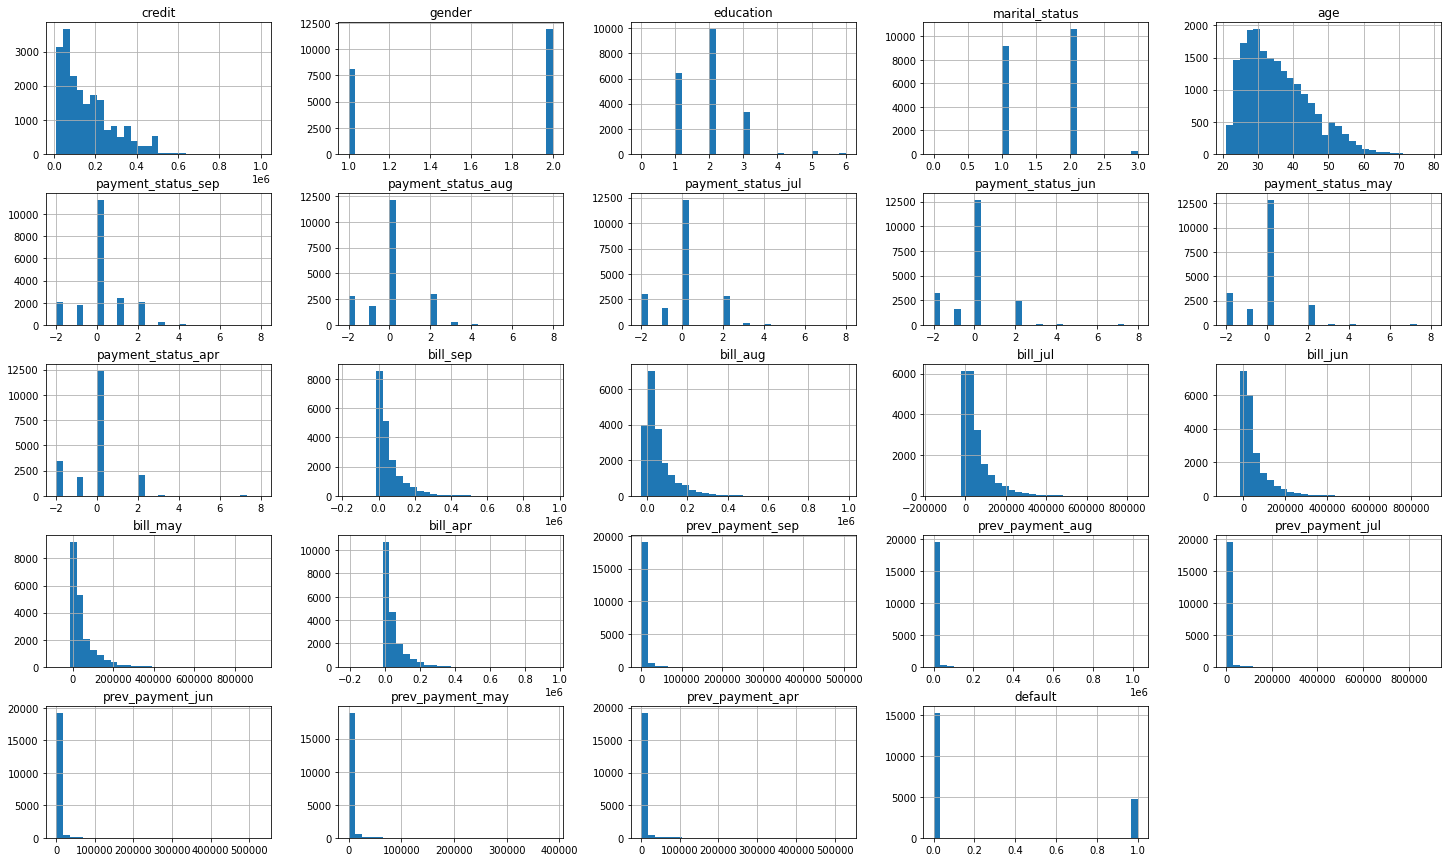

In [12]:
df.hist(bins=30, figsize=(25,15))
plt.show()

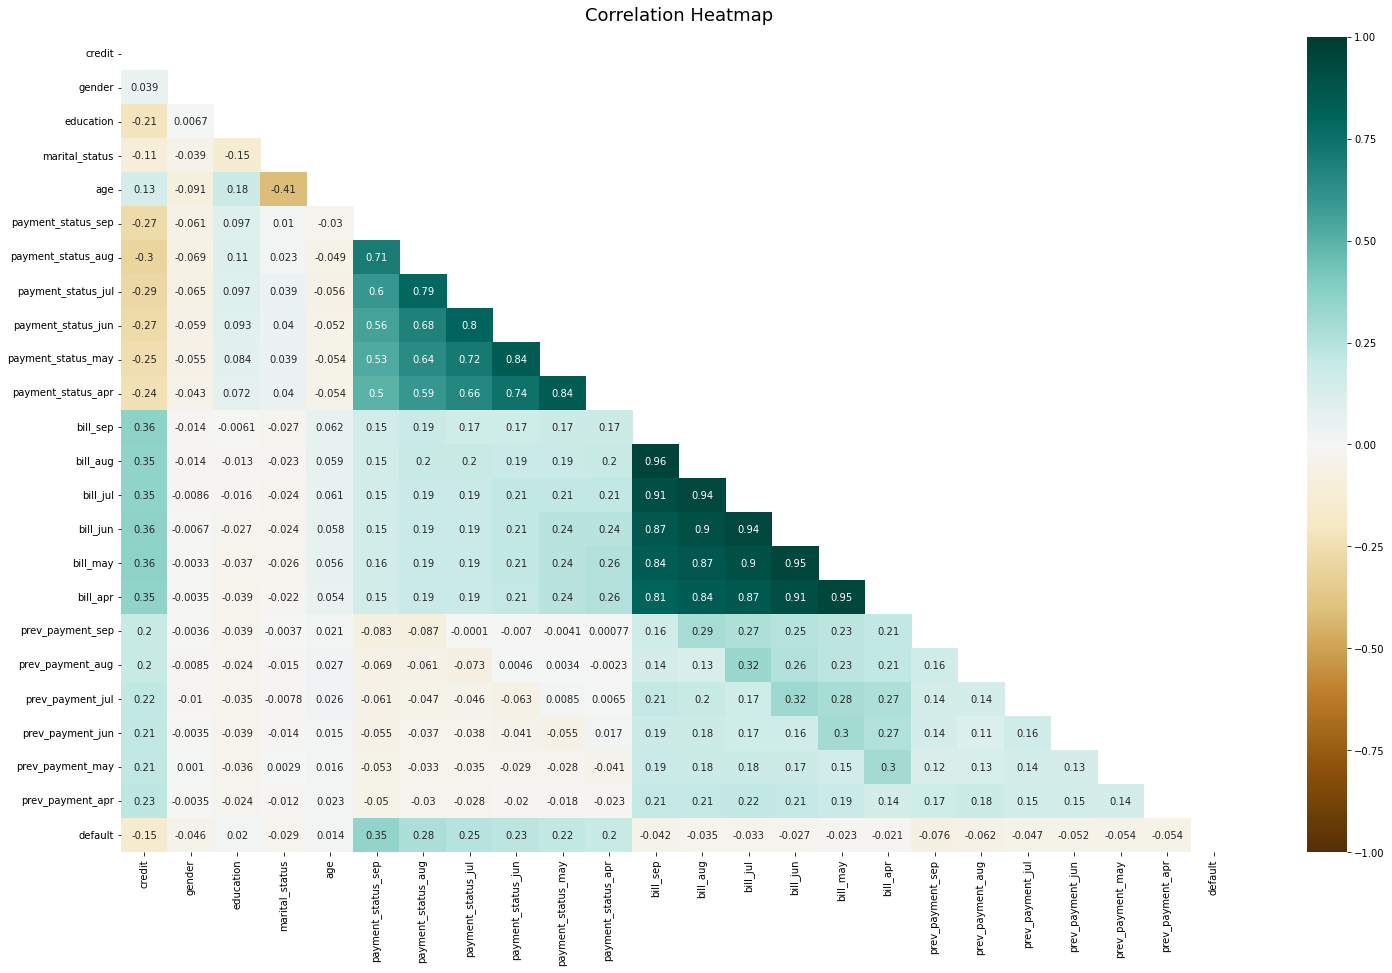

In [13]:
# correlation heatmap
plt.figure(figsize=(25, 15))
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
heatmap = sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

# 2. Data Preprocessing

Perform data preprocessing including the following steps when applicable: identify and treat outliers, imputation of missing values, and encoding (Week #2 lecture)

## 2.1 Fix Skewness

In [5]:
from sklearn.preprocessing import QuantileTransformer
skew_columns = ['prev_payment_sep', 'prev_payment_aug', 'prev_payment_jul', 'prev_payment_jun', 'prev_payment_may', 'prev_payment_apr']

qt = QuantileTransformer(n_quantiles=1000, output_distribution='normal', random_state=0)
df[skew_columns] = qt.fit_transform(df[skew_columns])

In [6]:
df.skew()

credit                1.101497
gender               -0.389038
education             0.956514
marital_status        0.006747
age                   0.737895
payment_status_sep    0.575211
payment_status_aug    0.589468
payment_status_jul    0.650922
payment_status_jun    0.841887
payment_status_may    0.852012
payment_status_apr    0.807809
bill_sep              2.457284
bill_aug              2.480323
bill_jul              2.511583
bill_jun              2.609493
bill_may              2.701419
bill_apr              2.682381
prev_payment_sep     -1.296809
prev_payment_aug     -1.267086
prev_payment_jul     -1.195028
prev_payment_jun     -1.143123
prev_payment_may     -1.094022
prev_payment_apr     -1.007565
default               1.236444
dtype: float64

## 2.2 Standardization

In [7]:
from sklearn.preprocessing import StandardScaler
standardized_columns = ['credit', 'age', 'bill_sep', 'bill_aug', 'bill_jul', 'bill_jun', 'bill_may', 'bill_apr']

scaler = StandardScaler()
df[standardized_columns] = scaler.fit_transform(df[standardized_columns])

In [8]:
df[standardized_columns].describe()

,credit,age,bill_sep,bill_aug,bill_jul,bill_jun,bill_may,bill_apr
count,2.010200e+04,2.010200e+04,2.010200e+04,2.010200e+04,2.010200e+04,2.010200e+04,2.010200e+04,2.010200e+04
mean,8.642530e-16,-1.521317e-16,1.097341e-16,1.257236e-15,-1.034024e-15,6.155031e-16,-9.799091e-16,-1.254626e-15
std,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00
min,-1.159730e+00,-1.546201e+00,-2.922383e+00,-1.173075e+00,-2.952004e+00,-1.950824e+00,-1.996706e+00,-4.056331e+00
25%,-8.487053e-01,-7.938953e-01,-6.668380e-01,-6.673845e-01,-6.570588e-01,-6.479743e-01,-6.514315e-01,-6.646838e-01
50%,-2.266552e-01,-1.490615e-01,-3.697472e-01,-3.652981e-01,-3.629622e-01,-3.642787e-01,-3.750069e-01,-3.878319e-01
75%,5.509075e-01,6.032445e-01,2.564750e-01,2.625676e-01,2.456005e-01,2.438027e-01,2.185353e-01,2.144036e-01
max,6.538140e+00,4.687192e+00,1.176825e+01,1.249576e+01,1.116472e+01,1.249880e+01,1.374977e+01,1.464727e+01


## 2.3 Gender Encoding

In [9]:
# change values from 1 and 2 to 
# 1 = male and 0 = female

In [10]:
df['gender'] = np.where(df['gender'] == 2, 0, 1)

## 2.4 Dummy Variables for Education and Marital Status


In [11]:
categorical_features = ['education', 'marital_status']
df = pd.get_dummies(df, columns=categorical_features, drop_first=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20102 entries, 0 to 20101
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   credit              20102 non-null  float64
 1   gender              20102 non-null  int32  
 2   age                 20102 non-null  float64
 3   payment_status_sep  20102 non-null  int64  
 4   payment_status_aug  20102 non-null  int64  
 5   payment_status_jul  20102 non-null  int64  
 6   payment_status_jun  20102 non-null  int64  
 7   payment_status_may  20102 non-null  int64  
 8   payment_status_apr  20102 non-null  int64  
 9   bill_sep            20102 non-null  float64
 10  bill_aug            20102 non-null  float64
 11  bill_jul            20102 non-null  float64
 12  bill_jun            20102 non-null  float64
 13  bill_may            20102 non-null  float64
 14  bill_apr            20102 non-null  float64
 15  prev_payment_sep    20102 non-null  float64
 16  prev

## 2.5 Previous Payment Status Encoding

In [12]:
# convert payment status columns to categorical type
# so we can create dummy variables
column_types = {
    'payment_status_sep': 'category',
    'payment_status_aug': 'category',
    'payment_status_jul': 'category',
    'payment_status_jun': 'category',
    'payment_status_may': 'category',
    'payment_status_apr': 'category'
}

payment_status_df = df.astype(column_types)
payment_status_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20102 entries, 0 to 20101
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   credit              20102 non-null  float64 
 1   gender              20102 non-null  int32   
 2   age                 20102 non-null  float64 
 3   payment_status_sep  20102 non-null  category
 4   payment_status_aug  20102 non-null  category
 5   payment_status_jul  20102 non-null  category
 6   payment_status_jun  20102 non-null  category
 7   payment_status_may  20102 non-null  category
 8   payment_status_apr  20102 non-null  category
 9   bill_sep            20102 non-null  float64 
 10  bill_aug            20102 non-null  float64 
 11  bill_jul            20102 non-null  float64 
 12  bill_jun            20102 non-null  float64 
 13  bill_may            20102 non-null  float64 
 14  bill_apr            20102 non-null  float64 
 15  prev_payment_sep    20102 non-null  

In [13]:
# create dummy variables for payment status columns
payment_columns = ['payment_status_sep','payment_status_aug','payment_status_jul', 'payment_status_jun', 'payment_status_may', 'payment_status_apr']

payment_status_df = pd.get_dummies(payment_status_df[payment_columns])
payment_status_df['default'] = df['default']
payment_status_df.head()

,payment_status_sep_-2,payment_status_sep_-1,payment_status_sep_0,payment_status_sep_1,payment_status_sep_2,payment_status_sep_3,payment_status_sep_4,payment_status_sep_5,payment_status_sep_6,payment_status_sep_7,...,payment_status_apr_-1,payment_status_apr_0,payment_status_apr_2,payment_status_apr_3,payment_status_apr_4,payment_status_apr_5,payment_status_apr_6,payment_status_apr_7,payment_status_apr_8,default
0,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
4,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


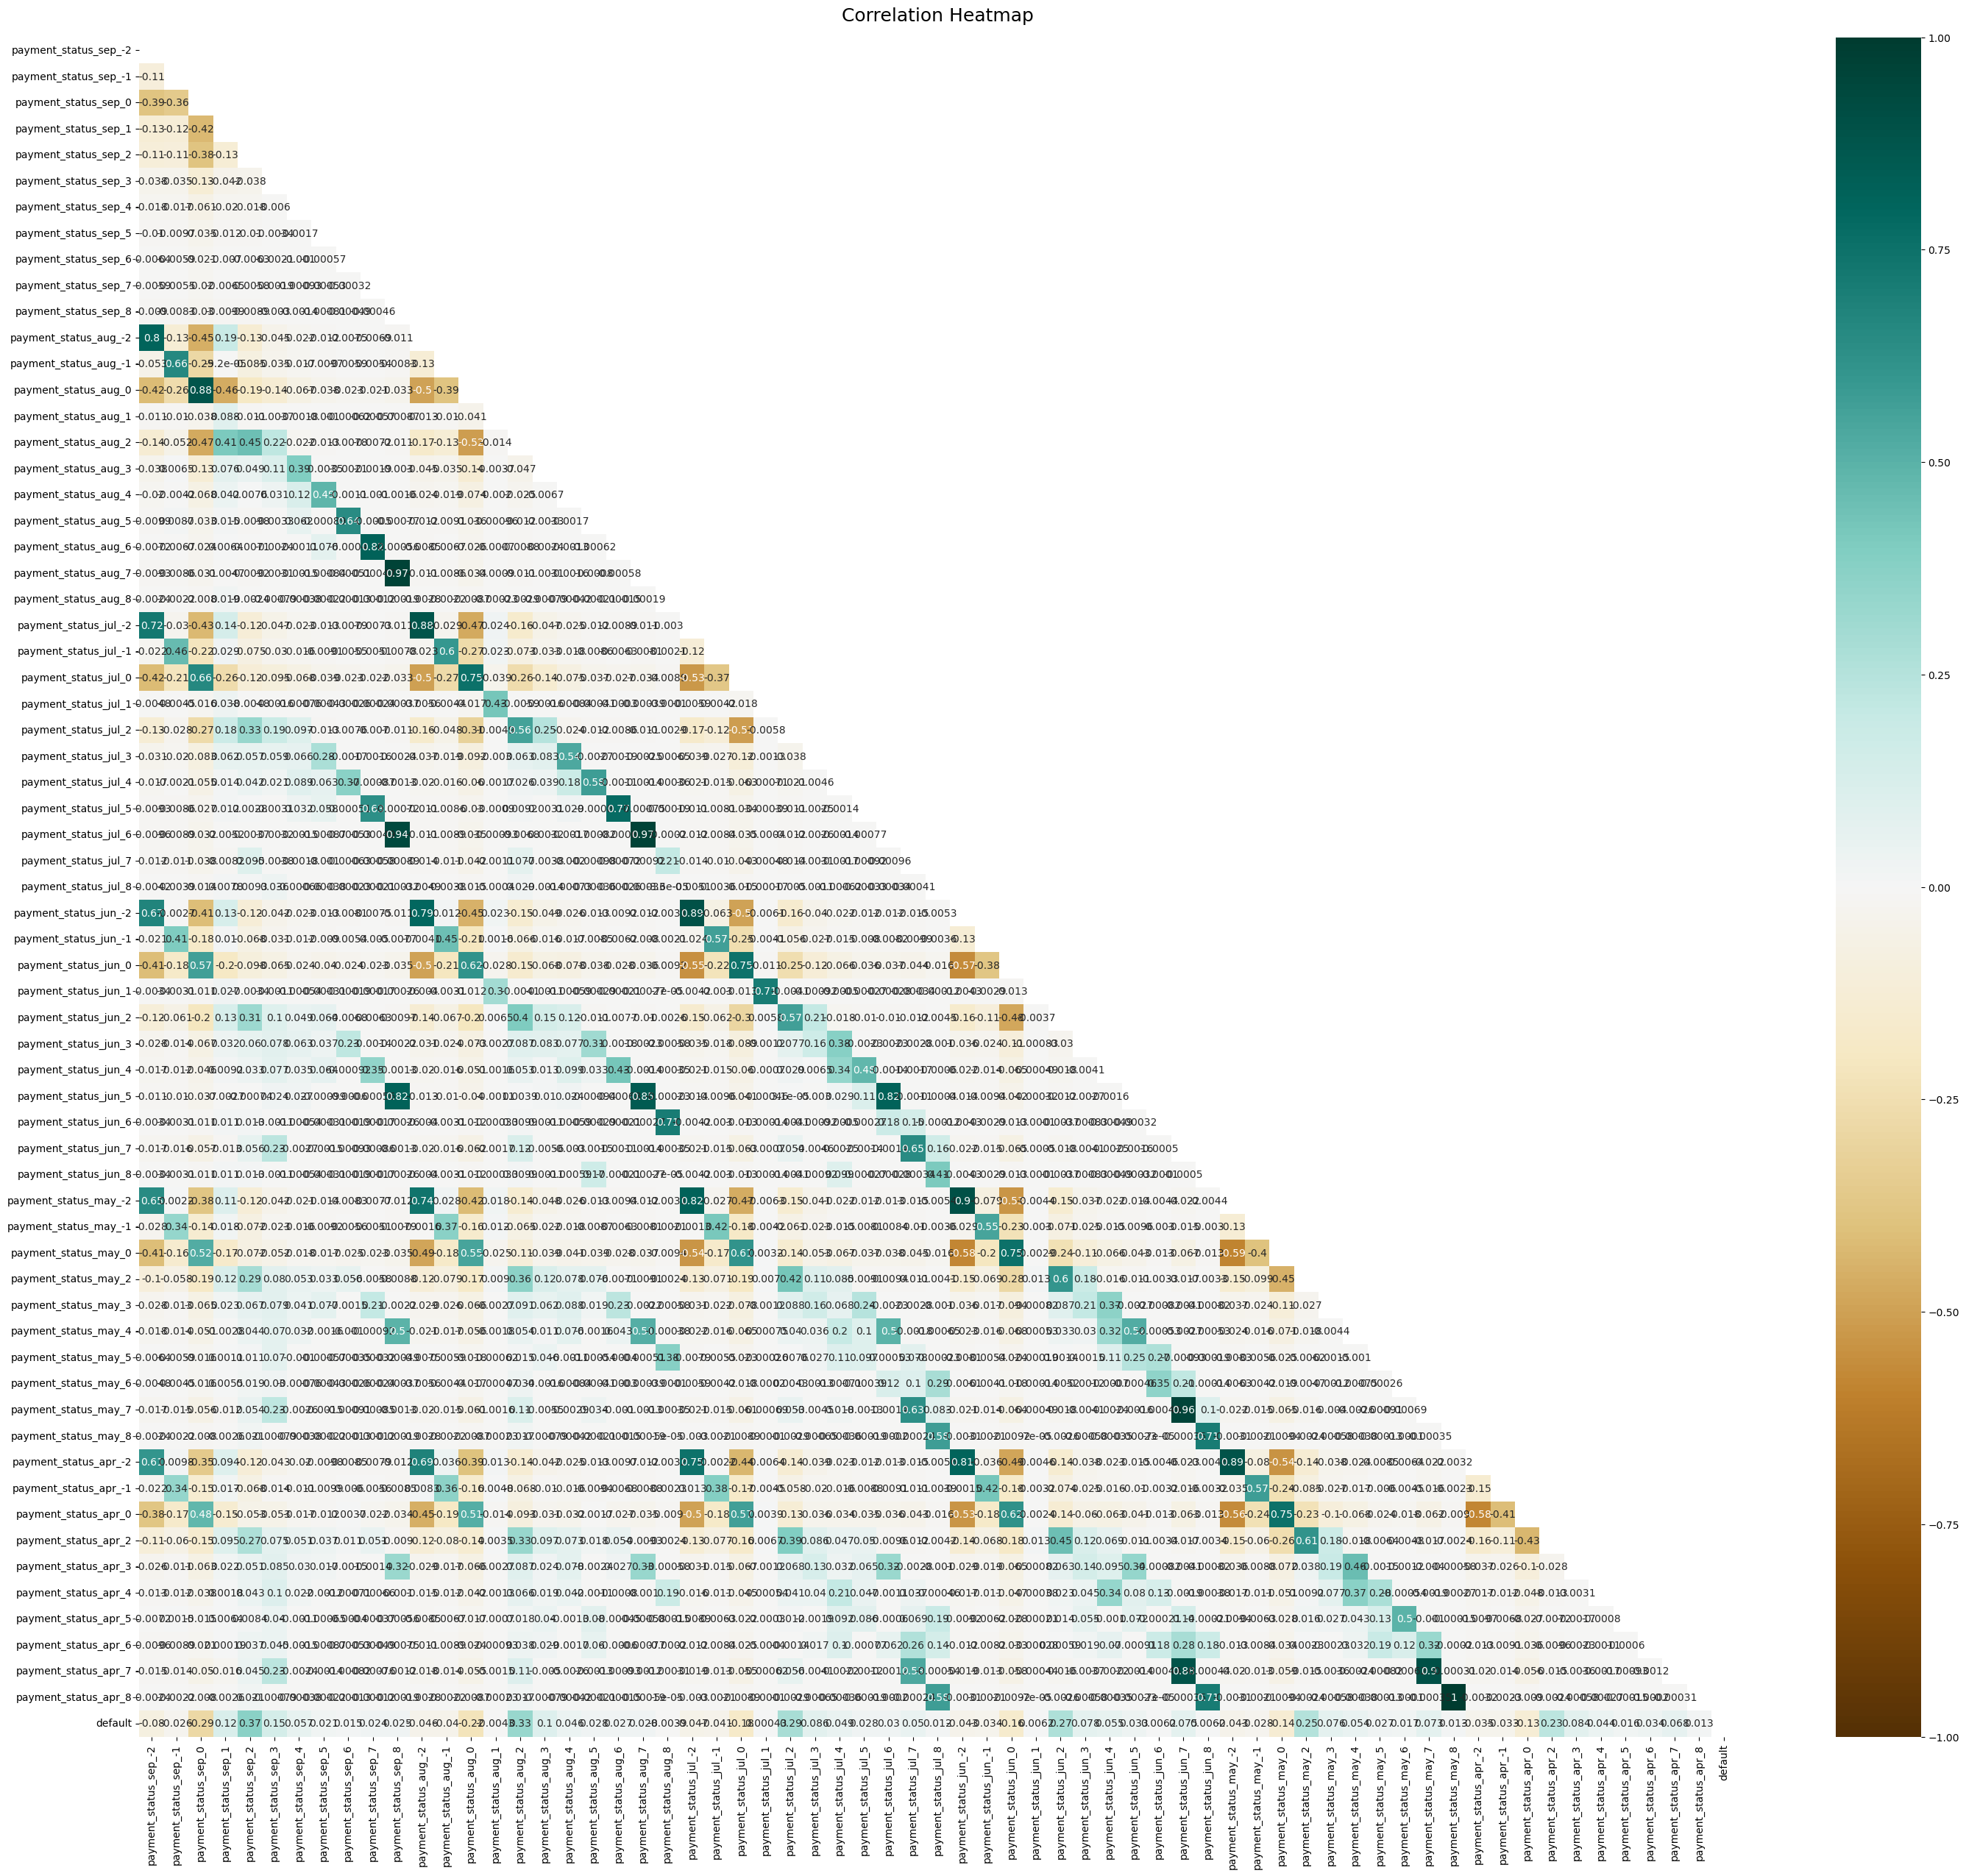

In [14]:
# correlation heatmap
plt.figure(figsize=(35, 30))
mask = np.triu(np.ones_like(payment_status_df.corr(), dtype=bool))
heatmap = sns.heatmap(payment_status_df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

The correlation heatmap shows a slight negative correlation with default when the payment a negative or zero value, and a slight positive correlation when it is a positive value. Based on this, we will collapse these variables into a single binary late payment feature for each month.

In [15]:
# create new columns for late payment based on payment status columns
# then drop payment status columns
late_payment_columns = {
    'late_payment_sep':'payment_status_sep',
    'late_payment_aug':'payment_status_aug',
    'late_payment_jul':'payment_status_jul',
    'late_payment_jun':'payment_status_jun',
    'late_payment_may':'payment_status_may',
    'late_payment_apr':'payment_status_apr'
}

for column in late_payment_columns:
  df[column] = np.where(df[late_payment_columns[column]] > 0, 1, 0)

df = df.drop(columns=payment_columns)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20102 entries, 0 to 20101
Data columns (total 31 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   credit            20102 non-null  float64
 1   gender            20102 non-null  int32  
 2   age               20102 non-null  float64
 3   bill_sep          20102 non-null  float64
 4   bill_aug          20102 non-null  float64
 5   bill_jul          20102 non-null  float64
 6   bill_jun          20102 non-null  float64
 7   bill_may          20102 non-null  float64
 8   bill_apr          20102 non-null  float64
 9   prev_payment_sep  20102 non-null  float64
 10  prev_payment_aug  20102 non-null  float64
 11  prev_payment_jul  20102 non-null  float64
 12  prev_payment_jun  20102 non-null  float64
 13  prev_payment_may  20102 non-null  float64
 14  prev_payment_apr  20102 non-null  float64
 15  default           20102 non-null  int64  
 16  education_1       20102 non-null  uint8 

In [16]:
# rearrange columns to more easily view the correlation heatmap
ordered_columns = list(df.columns.values)
ordered_columns.remove('default')
ordered_columns.append('default')
df = df[ordered_columns]

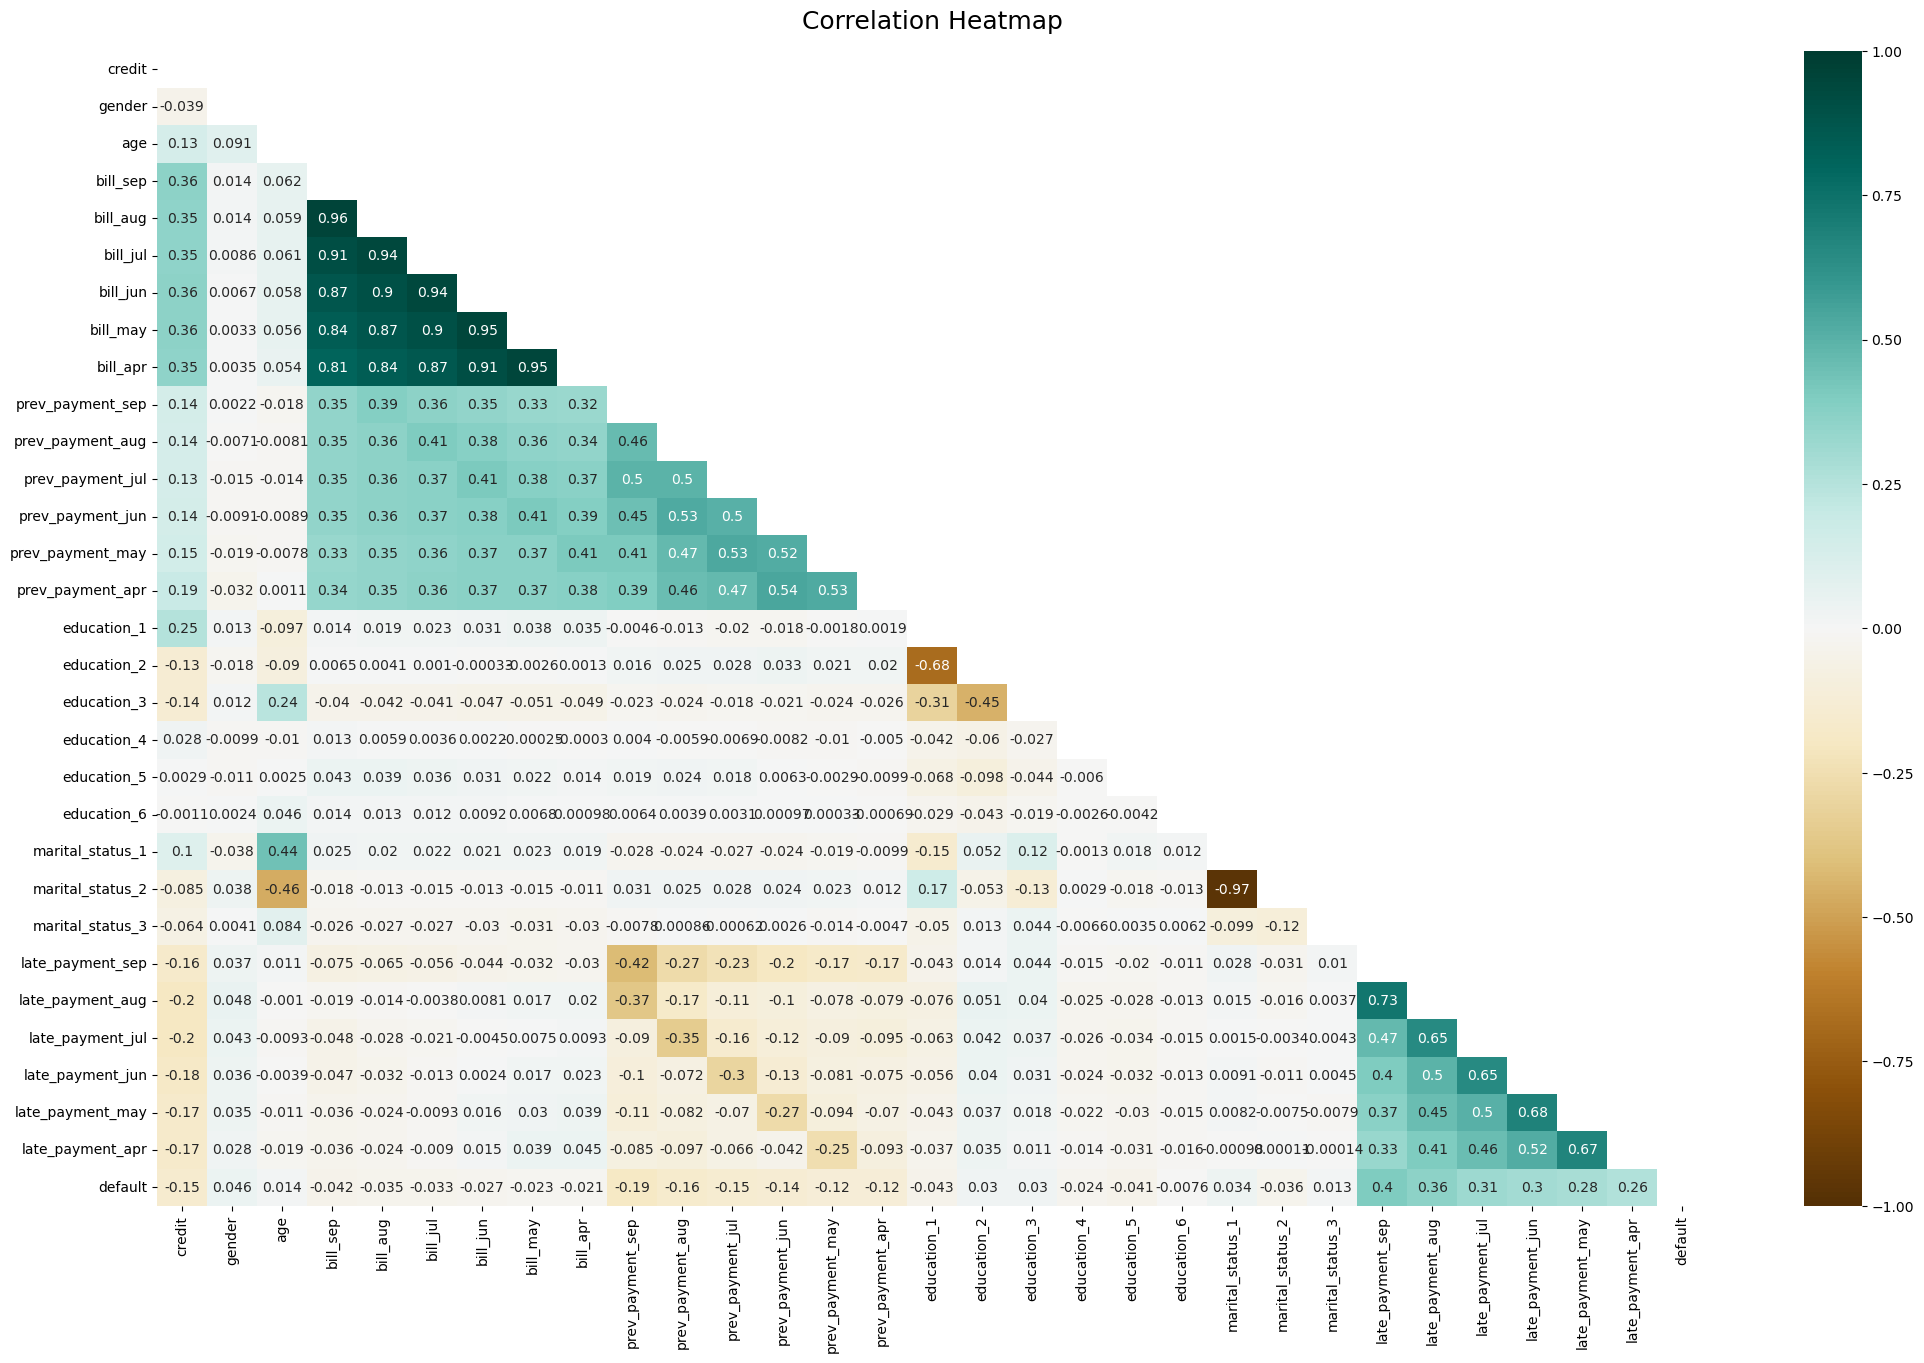

In [17]:
# new correlation heatmap with late payment features
plt.figure(figsize=(25, 15))
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
heatmap = sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

# 3. Feature Engineering

Prepare data for training and testing data including feature engineering (Week #2 lecture).

# 4. Model Building

Explore and build several model alternatives including traditional statistical models (Generalized Linear Models or Decision Tree), Ensemble Models (Gradient Boosting Machine or Random Forest) and Neural Networks. Bonus point: apply inherently interpretable machine learning models such as Explainable Boosting Machine, Generalized Additive Model with Interaction (GAMI) Networks (Week #2-5 lectures).
1. Evaluate and compare model performance with appropriate metrics.
2. Perform hyper-parameter tuning including model regularization.
3. Analyze for over/underfitting regions of data.
4. Apply constraints (e.g., monotonicity) when appropriate.
5. Iterate for feature engineering when needed.

In [18]:
# split dataset
from sklearn.model_selection import train_test_split
X = df.drop(columns='default')
y = df['default']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

## 4.1 Model Training

## 4.1.0 Helper Functions

In [19]:
import sklearn.metrics
from sklearn.metrics import RocCurveDisplay, confusion_matrix, ConfusionMatrixDisplay

In [47]:
# capture common classifier performance metrics in one place
def get_clf_performance(model, X_test, y_test):
    predictions = model.predict(X_test)
    predict_probability = model.predict_proba(X_test)[:,1]
    return {
        'accuracy': sklearn.metrics.accuracy_score(y_test, predictions),
        'precision': sklearn.metrics.precision_score(y_test, predictions),
        'recall': sklearn.metrics.recall_score(y_test, predictions),
        'f1': sklearn.metrics.f1_score(y_test, predictions),
        'roc_auc': sklearn.metrics.roc_auc_score(y_test, predict_probability)
    }

In [32]:
# set scoring metric used to choose the best model
scoring = 'precision'

### 4.1.1 Logistic Regression

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, KFold

lr_model = LogisticRegression()

search_space = {
    'penalty': ['l1','l2'], 
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'solver': ['newton-cg', 'lbfgs', 'liblinear']
}

# Define cross validation
k_fold = KFold(n_splits=10)

# Define grid search
lr_clf = GridSearchCV(
    lr_model,
    param_grid = search_space,
    cv = k_fold,
    scoring = scoring,
    verbose = 1,
    n_jobs = -1
)

# Fit grid search
lr_clf.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
140 fits failed out of a total of 420.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
70 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError: Solv

GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             scoring='roc_auc', verbose=2)

accuracy: 0.7901019646854016
precision: 0.6402569593147751
recall: 0.30666666666666664
f1: 0.41470180305131754
roc_auc: 0.6257561829722039


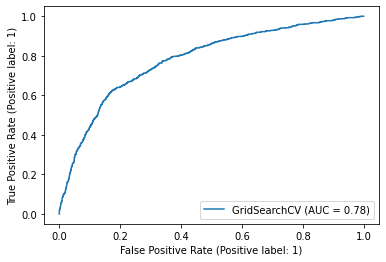

In [39]:
# get performance metrics
lr_clf_metrics = get_clf_performance(lr_clf, X_test, y_test)

for metric in lr_clf_metrics:
    print(f'{metric}: {lr_clf_metrics[metric]}')

# ROC curve
lr_roc = RocCurveDisplay.from_estimator(lr_clf, X_test, y_test)

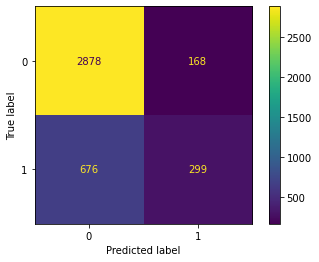

In [40]:
# confusion matrix
lr_predictions = lr_clf.predict(X_test)
cm = confusion_matrix(y_test, lr_predictions, labels=lr_clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lr_clf.classes_)
disp.plot()

In [47]:
# get best model hyperparameters
print(lr_clf.best_params_)

{'C': 0.01, 'penalty': 'l2', 'solver': 'newton-cg'}


In [48]:
# model coeffecients
lr_clf.best_estimator_.coef_

array([[-0.24882229,  0.11903952, -0.00186943, -0.00409523,  0.09693972,
         0.01835433,  0.0294036 ,  0.00417285,  0.02723916, -0.0412187 ,
        -0.02606773, -0.0365349 , -0.02987074, -0.00980581, -0.01644743,
         0.0579297 ,  0.08474311,  0.07478456, -0.06314398, -0.13939511,
        -0.01140154,  0.06269969, -0.06559404,  0.01812371,  1.02738272,
         0.25192758,  0.34416756,  0.26849248,  0.26673603,  0.36355274]])

### 4.1.2 Decision Tree

In [49]:
# base model
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, KFold

tree_model = DecisionTreeClassifier()

search_space = {
    'max_features': ['sqrt', 'log2'],
    'max_depth' : [2,4,6,7,8],
    'criterion' :['gini', 'entropy']
}

# Define cross validation
k_fold = KFold(n_splits=10)

# Define grid search
tree_clf = GridSearchCV(
    tree_model,
    param_grid = search_space,
    cv = k_fold,
    scoring = scoring,
    verbose = 1,
    n_jobs = -1
)

# Fit grid search
tree_clf.fit(X_train, y_train)

Fitting 10 folds for each of 20 candidates, totalling 200 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
             estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 7, 8],
                         'max_features': ['sqrt', 'log2']},
             scoring='roc_auc', verbose=2)

accuracy: 0.7915941308132305
precision: 0.6026986506746627
recall: 0.4123076923076923
f1: 0.48964677222898906
roc_auc: 0.6626541744532553


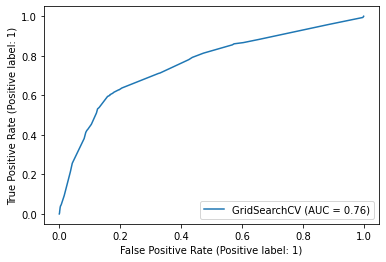

In [50]:
# get performance metrics
clf_metrics = get_clf_performance(tree_clf, X_test, y_test)

for metric in clf_metrics:
    print(f'{metric}: {clf_metrics[metric]}')

# ROC curve
roc = RocCurveDisplay.from_estimator(tree_clf, X_test, y_test)

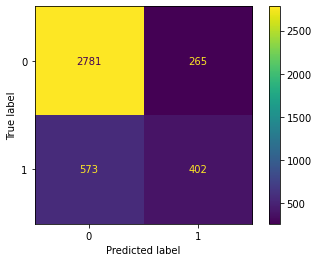

In [51]:
# confusion matrix
tree_predictions = tree_clf.predict(X_test)
cm = confusion_matrix(y_test, tree_predictions, labels=tree_clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=tree_clf.classes_)
disp.plot()

In [52]:
# get best model hyperparameters
print(tree_clf.best_params_)

{'criterion': 'entropy', 'max_depth': 6, 'max_features': 'sqrt'}


[Text(0.518107476635514, 0.9285714285714286, 'X[24] <= 0.5\nentropy = 0.788\nsamples = 16081\nvalue = [12290, 3791]'),
 Text(0.2733644859813084, 0.7857142857142857, 'X[26] <= 0.5\nentropy = 0.582\nsamples = 12213\nvalue = [10512, 1701]'),
 Text(0.14953271028037382, 0.6428571428571429, 'X[12] <= -0.219\nentropy = 0.547\nsamples = 11490\nvalue = [10038, 1452]'),
 Text(0.07476635514018691, 0.5, 'X[11] <= -0.641\nentropy = 0.655\nsamples = 4205\nvalue = [3496, 709]'),
 Text(0.037383177570093455, 0.35714285714285715, 'X[27] <= 0.5\nentropy = 0.721\nsamples = 1808\nvalue = [1447, 361]'),
 Text(0.018691588785046728, 0.21428571428571427, 'X[8] <= 1.683\nentropy = 0.706\nsamples = 1696\nvalue = [1370, 326]'),
 Text(0.009345794392523364, 0.07142857142857142, 'entropy = 0.704\nsamples = 1694\nvalue = [1370, 324]'),
 Text(0.028037383177570093, 0.07142857142857142, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.056074766355140186, 0.21428571428571427, 'X[14] <= -0.677\nentropy = 0.896\nsamp

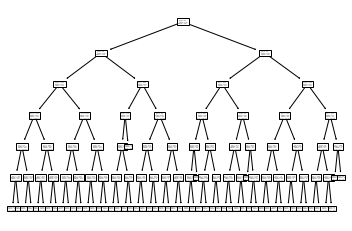

In [53]:
from sklearn import tree
tree.plot_tree(tree_clf.best_estimator_)

### 4.1.3 Gradient Boosting

In [ ]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV, KFold

# use grid search to train the classifier
xgb_model = xgb.XGBClassifier()

search_space = [
  {
    'n_estimators': [50, 100, 500, 1000],
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'max_depth': range(3, 10),
    'colsample_bytree': [i/10.0 for i in range(1, 3)],
    'gamma': [i/10.0 for i in range(3)],
  }
]

# Define early stopping parameters
fit_params = {
    'early_stopping_rounds':  20,
    'eval_metric' : 'auc',
    'eval_set' : [[X_test, y_test]]
}

# Define cross validation
k_fold = KFold(n_splits=10)

# Define grid search
xgb_clf = GridSearchCV(
    xgb_model,
    param_grid = search_space,
    cv = k_fold,
    scoring = scoring,
    verbose = 0,
)

# Fit grid search
xgb_clf.fit(X_train, y_train, **fit_params)

accuracy: 0.7963193235513554
precision: 0.6387900355871886
recall: 0.3682051282051282
f1: 0.46714378659726735
roc_auc: 0.6507801740828661


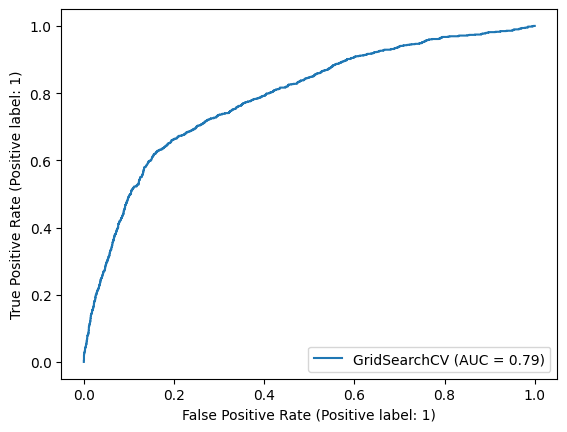

In [33]:
xgb_clf_metrics = get_clf_performance(xgb_clf, X_test, y_test)

for metric in xgb_clf_metrics:
    print(f'{metric}: {xgb_clf_metrics[metric]}')

# ROC curve
xgb_roc = RocCurveDisplay.from_estimator(xgb_clf, X_test, y_test)

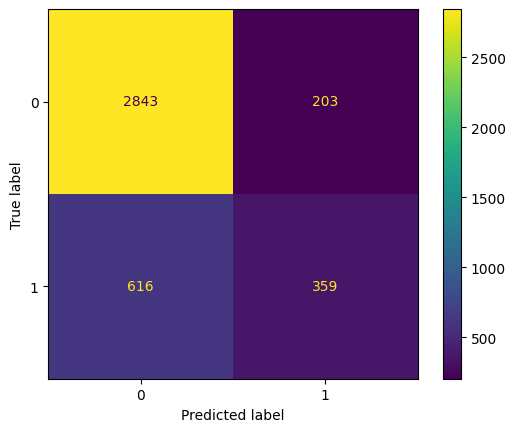

In [34]:
# confusion matrix
xgb_predictions = xgb_clf.predict(X_test)
cm = confusion_matrix(y_test, xgb_predictions, labels=xgb_clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=xgb_clf.classes_)
disp.plot()

In [36]:
# get best model parameters
print(xgb_clf.best_params_)

{'colsample_bytree': 0.2, 'gamma': 0.0, 'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 100}


### 4.1.4 Random Forest

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, KFold

rf_model = RandomForestClassifier()

search_space = {
    'n_estimators': [200, 500, 1000, 10000],
    'max_features': ['sqrt', 'log2'],
    'max_depth' : [2,4,6,7,8],
    'criterion' :['gini', 'entropy']
}

# Define cross validation
k_fold = KFold(n_splits=10)

# Define grid search
rf_clf = GridSearchCV(
    rf_model,
    param_grid = search_space,
    cv = k_fold,
    scoring = scoring,
    verbose = 1,
    n_jobs = -1
)

# Fit grid search
rf_clf.fit(X_train, y_train)

Fitting 10 folds for each of 80 candidates, totalling 800 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 7, 8],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [200, 500, 1000, 10000]},
             scoring='roc_auc', verbose=1)

accuracy: 0.7960706291967172
precision: 0.6376554174067496
recall: 0.3682051282051282
f1: 0.4668400520156047
roc_auc: 0.6506160243783357


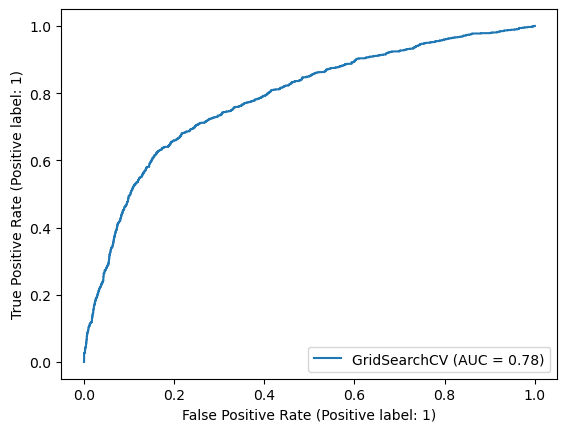

In [22]:
# get performance metrics
rf_clf_metrics = get_clf_performance(rf_clf, X_test, y_test)

for metric in rf_clf_metrics:
    print(f'{metric}: {rf_clf_metrics[metric]}')

# ROC curve
rf_roc = RocCurveDisplay.from_estimator(rf_clf, X_test, y_test)

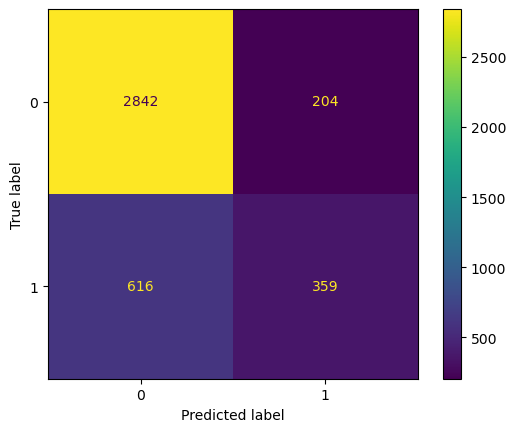

In [23]:
# confusion matrix
rf_predictions = rf_clf.predict(X_test)
cm = confusion_matrix(y_test, rf_predictions, labels=rf_clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_clf.classes_)
disp.plot()

In [24]:
# get best model parameters
print(rf_clf.best_params_)

{'criterion': 'entropy', 'max_depth': 8, 'max_features': 'sqrt', 'n_estimators': 1000}


In [27]:
from sklearnex import patch_sklearn
patch_sklearn()
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, KFold

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [33]:
rf_model = RandomForestClassifier()

search_space = {
    'n_estimators': [200, 500, 1000, 10000],
    'max_features': ['sqrt', 'log2'],
    'max_depth' : [2,4,6,7,8],
    'criterion' :['gini', 'entropy']
}

# Define cross validation
k_fold = KFold(n_splits=10)

# Define grid search
rf_clf = GridSearchCV(
    rf_model,
    param_grid = search_space,
    cv = k_fold,
    scoring = scoring,
    verbose = 1,
    n_jobs = -1
)

# Fit grid search
rf_clf.fit(X_train, y_train)

Fitting 10 folds for each of 80 candidates, totalling 800 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 7, 8],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [200, 500, 1000, 10000]},
             scoring='precision', verbose=1)

accuracy: 0.7794081074359612
precision: 0.6705426356589147
recall: 0.17743589743589744
f1: 0.2806163828061638
roc_auc: 0.769468660033335


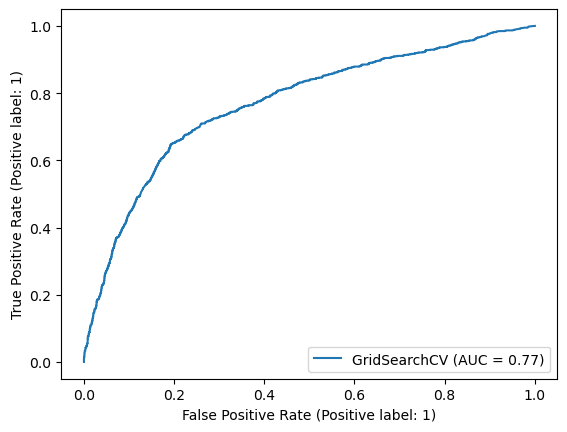

In [48]:
# get performance metrics
rf_clf_metrics = get_clf_performance(rf_clf, X_test, y_test)

for metric in rf_clf_metrics:
    print(f'{metric}: {rf_clf_metrics[metric]}')

# ROC curve
rf_roc = RocCurveDisplay.from_estimator(rf_clf, X_test, y_test)

accuracy: 0.7794081074359612
precision: 0.6705426356589147
recall: 0.17743589743589744
f1: 0.2806163828061638
roc_auc: 0.769468660033335


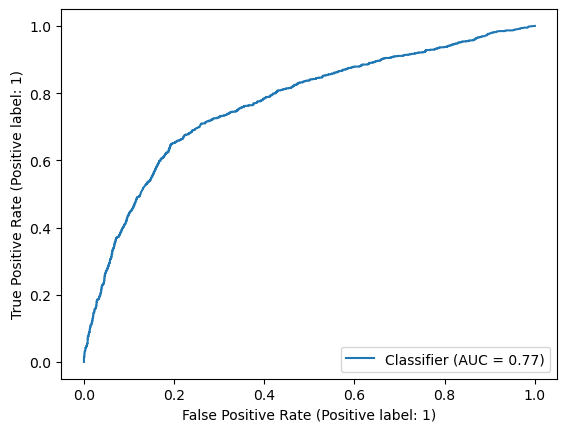

In [46]:
# get performance metrics
rf_clf_metrics = get_clf_performance(rf_clf, X_test, y_test)

for metric in rf_clf_metrics:
    print(f'{metric}: {rf_clf_metrics[metric]}')

# ROC curve
y_proba = rf_clf.predict_proba(X_test)[:,1]
rf_roc = RocCurveDisplay.from_predictions(y_test, y_proba)

In [35]:
# get best model parameters
print(rf_clf.best_params_)

{'criterion': 'gini', 'max_depth': 2, 'max_features': 'log2', 'n_estimators': 200}


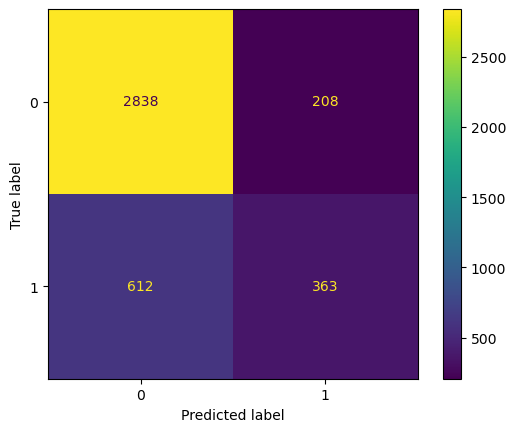

In [30]:
# confusion matrix
rf_predictions = rf_clf.predict(X_test)
cm = confusion_matrix(y_test, rf_predictions, labels=rf_clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_clf.classes_)
disp.plot()

In [31]:
# get best model parameters
print(rf_clf.best_params_)

{'criterion': 'entropy', 'max_depth': 8, 'max_features': 'sqrt', 'n_estimators': 10000}


### 4.1.5 Neural Network

In [ ]:
import torch
from torch.utils.data import Dataset, DataLoader



### 4.1.6 Explainable Boosting

https://interpret.ml/docs/ebm.html

### 4.1.7 GAMI Network

## 4.2 Model Comparison

# 5. Explainability and Interpretability

Apply explainability and interpretability tools using local and global post-hoc explainability tools to properly explain and understand the models. Identify important variables and diagnose model input-output relationships. (Week #7 lecture)

# 6. Model Refinement

Refine models by properly select covariates to account for collinearity and causality (conditional independence test) (Week #6 lecture)

# 7. Model Robustness

Apply robustness test to compare models (Week #8 lecture)

# 8. Model Reliability

Diagnose model prediction reliability: identify regions where model predictions less reliable by studying prediction interval width or out of coverage area (Week #10 lecture)

# 9. Distribution Shift

Test and compare models under distribution shift and out of distribution (Week #11 lecture)

# 10. Fairness Testing (optional)

Bonus point: apply fairness test (Week #11 lecture)